In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import transforms, datasets

In [3]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

True
1


In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
trainset = datasets.MNIST(root='/scratch/yardima/data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=60,
                                          shuffle=True, num_workers=1)

testset = datasets.MNIST(root='/scratch/yardima/data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=60,
                                          shuffle=False, num_workers=1)

tensor([5, 5, 5, 3, 2, 3, 8, 4, 5, 7, 5, 7, 0, 3, 1, 3, 9, 9, 0, 3, 8, 0, 2, 5,
        6, 8, 0, 9, 1, 3, 8, 7, 5, 1, 9, 4, 8, 3, 8, 3, 3, 9, 3, 4, 8, 7, 9, 0,
        8, 9, 2, 8, 0, 6, 2, 1, 0, 7, 9, 8])


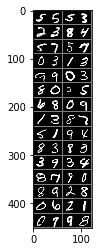

In [ ]:
dataiter = iter(trainloader)
i, l = dataiter.next()

g = torchvision.utils.make_grid(i, nrow=4)

g = g / 2 + 0.5     # unnormalize
npimg = g.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))

print(l)

In [ ]:
class CNN(nn.Module):
    
    def __init__(self):
        super(CNN, self).__init__()
        
        self.c1 = nn.Conv2d(1, 8, kernel_size=5)
        self.c2 = nn.Conv2d(8, 16, kernel_size=3)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 10)
        
    
    def forward(self, x):
        
        x = F.relu(self.c1(x))
        x = F.max_pool2d(x, kernel_size=2)
        
        x = F.relu(self.c2(x))
        x = F.max_pool2d(x, kernel_size=2)
        
        x = x.view(-1, 16 * 5 * 5)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    

In [ ]:
cnn = CNN()
cnn.to(device)
loss_fun = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr = 3e-3, momentum=0.9)

In [ ]:
## print number of parameters in network:
pcount = 0
for p in cnn.parameters():
    pcount += p.numel()
    
print("Total trainable parameter count: {}".format(pcount))

Total trainable parameter count: 57162


In [ ]:
%%time
print_step = len(trainset) // (trainloader.batch_size * 4)

for e in range(150):
    running_loss = 0.
    
    for i, batch in enumerate(trainloader, 1):
        x, label = batch
        x, label = x.to(device), label.to(device)
        
        optimizer.zero_grad()
        out = cnn.forward(x)
        loss = loss_fun(out, label)
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
        
        if i % print_step == 0:
            print('[%d, %5d] loss: %.3f' %
                  (e + 1, i, running_loss / print_step))
            running_loss = 0.

[1,   250] loss: 2.280
[1,   500] loss: 1.091
[1,   750] loss: 0.247
[1,  1000] loss: 0.177
[2,   250] loss: 0.137
[2,   500] loss: 0.121
[2,   750] loss: 0.115
[2,  1000] loss: 0.098
[3,   250] loss: 0.087
[3,   500] loss: 0.088
[3,   750] loss: 0.079
[3,  1000] loss: 0.083
[4,   250] loss: 0.070
[4,   500] loss: 0.063
[4,   750] loss: 0.062
[4,  1000] loss: 0.066
[5,   250] loss: 0.052
[5,   500] loss: 0.057
[5,   750] loss: 0.054
[5,  1000] loss: 0.053
[6,   250] loss: 0.046
[6,   500] loss: 0.050
[6,   750] loss: 0.043
[6,  1000] loss: 0.048
[7,   250] loss: 0.038
[7,   500] loss: 0.044
[7,   750] loss: 0.036
[7,  1000] loss: 0.046
[8,   250] loss: 0.033
[8,   500] loss: 0.034
[8,   750] loss: 0.035
[8,  1000] loss: 0.039
[9,   250] loss: 0.030
[9,   500] loss: 0.029
[9,   750] loss: 0.035
[9,  1000] loss: 0.032
[10,   250] loss: 0.027
[10,   500] loss: 0.028
[10,   750] loss: 0.031
[10,  1000] loss: 0.028
[11,   250] loss: 0.023
[11,   500] loss: 0.025
[11,   750] loss: 0.028
[11,

[86,  1000] loss: 0.000
[87,   250] loss: 0.000
[87,   500] loss: 0.000
[87,   750] loss: 0.000
[87,  1000] loss: 0.000
[88,   250] loss: 0.000
[88,   500] loss: 0.000
[88,   750] loss: 0.000
[88,  1000] loss: 0.000
[89,   250] loss: 0.000
[89,   500] loss: 0.000
[89,   750] loss: 0.000
[89,  1000] loss: 0.000
[90,   250] loss: 0.000
[90,   500] loss: 0.000
[90,   750] loss: 0.000
[90,  1000] loss: 0.000
[91,   250] loss: 0.000
[91,   500] loss: 0.000
[91,   750] loss: 0.000
[91,  1000] loss: 0.000
[92,   250] loss: 0.000
[92,   500] loss: 0.000
[92,   750] loss: 0.000
[92,  1000] loss: 0.000
[93,   250] loss: 0.000
[93,   500] loss: 0.000
[93,   750] loss: 0.000
[93,  1000] loss: 0.000
[94,   250] loss: 0.000
[94,   500] loss: 0.000
[94,   750] loss: 0.000
[94,  1000] loss: 0.000
[95,   250] loss: 0.000
[95,   500] loss: 0.000
[95,   750] loss: 0.000
[95,  1000] loss: 0.000
[96,   250] loss: 0.000
[96,   500] loss: 0.000
[96,   750] loss: 0.000
[96,  1000] loss: 0.000
[97,   250] loss

In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % labels[j].item() for j in range(8)))

In [ ]:
y = cnn.forward(images.to(device)).cpu().data.numpy()
c = np.argmax(y, axis=1)
c

In [ ]:
dataiter = iter(testloader)
dataiter.next()
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % labels[j].item() for j in range(8)))

In [ ]:
y = cnn.forward(images.to(device)).cpu().data.numpy()
c = np.argmax(y, axis=1)
c

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = cnn(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: {}%'.format(
    100 * correct / total))